In [325]:
import uproot as uproot
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
border_x = [323.2, 969.6, 1939.2, 3878.4]
border_y = [323.2, 727.2, 1212.0, 3151.2]

In [4]:
data_Bs = uproot.open('data/ecal_opt/Correct_Hit.root')['Res'].pandas.df()

In [5]:
data_Bs.head()

runNumber  eventNumber  mother_ID  mother_PID       pDiff  thetaDiff  \
0       1082            1        165         111  375.909059   0.000247   
1       1082            1        165         111  -18.444655   0.000219   
2       1082            1        259         111   -1.531064   0.001838   
3       1082            1        259         111 -118.385475   0.000742   
4       1082            1        287         111  -80.467759   0.003140   

   thetaXDiff  thetaYDiff      xDiff      yDiff      ...              yRec  \
0   -0.000661    0.000170  -8.008530   2.654466      ...       -877.379526   
1   -0.000435    0.000289  -4.591556   4.083542      ...       -875.728993   
2    0.001503    0.001884  15.061196  21.838518      ...        789.171898   
3    0.000192    0.000776   1.367602   8.707026      ...        578.301987   
4    0.001327    0.003122  14.777402  34.882933      ...       2950.592692   

      zRec       pxRec       pyRec        pzRec    phiRec    etaRec  pidRec  \
0  12000.0 -211.072696 -291.210007  3982.905890 -2.197982  3.099789    22.0   
1  12000.0 -128.213760  -76.921666  1054.047547 -2.601211  2.651114    22.0   
2  12000.0  175.001069   48.581252   738.717414  0.270787  2.110931    22.0   
3  12000.0   16.677734   23.777781   493.398576  0.959131  3.526532    22.0   
4  12000.0   62.614576  276.521100  1124.605645  1.348115  2.086570    22.0   

      Time          tGen  
0  12058.0  12058.707454  
1  12129.0  12129.962896  
2  12362.0  12362.197528  
3  12030.0  12030.375686  
4  12376.0  12376.163916  

[5 rows x 45 columns]

In [6]:
np.unique(data_Bs.pidGen)

array([11., 22.])

In [7]:
len(data_Bs)

44790

In [8]:
data_Bs = data_Bs[(data_Bs.pidGen == 22.) | (data_Bs.pidGen == 11.)]

In [9]:
len(data_Bs[data_Bs.pidGen == 22.0])

44642

In [324]:
plt.hist(data_Bs.pGen / 1000, bins=100, label='all_particles');
plt.hist(data_Bs[data_Bs.pidGen == 22].pGen / 1000, bins=100, label='pidGen == 22', log=True);
plt.title('Hist of pGen, bins=100, GeV')
plt.legend()
plt.xlabel('GeV')

In [12]:
plt.scatter(data_Bs.xRec,data_Bs.yRec, s=1)
plt.xlim((-border_x[3], border_x[3]))
plt.ylim((-border_y[3], border_y[3]))
for i in range(4):
    plt.axvline(x=-border_x[i], ymin=0.5-border_y[i]/border_y[3]/2, ymax=0.5+border_y[i]/border_y[3]/2, color='red')
    plt.axvline(x=border_x[i], ymin=0.5-border_y[i]/border_y[3]/2, ymax=0.5+border_y[i]/border_y[3]/2, color='red')
    plt.axhline(y=-border_y[i], xmin=0.5-border_x[i]/border_x[3]/2, xmax=0.5+border_x[i]/border_x[3]/2, color='red')
    plt.axhline(y=border_y[i], xmin=0.5-border_x[i]/border_x[3]/2, xmax=0.5+border_x[i]/border_x[3]/2, color='red')

plt.xlabel('xRec, mm')
plt.ylabel('yRec, mm')

In [11]:
data_Bs_photons = data_Bs[['xGen','xRec','yGen','yRec','zGen','zRec','thetaXGen',\
                           'thetaYGen','pidGen']][data_Bs.pidGen == 22.].copy()

In [12]:
data_Bs_photons.head()

xGen         xRec         yGen         yRec     zGen     zRec  \
0  -627.927248  -635.935778  -880.033992  -877.379526  12000.0  12000.0   
1 -1455.081804 -1459.673360  -879.812535  -875.728993  12000.0  12000.0   
2  2827.721162  2842.782358   767.333380   789.171898  12000.0  12000.0   
3   404.253354   405.620956   569.594961   578.301987  12000.0  12000.0   
4   653.345614   668.123016  2915.709759  2950.592692  12000.0  12000.0   

   thetaXGen  thetaYGen  pidGen  
0  -0.052333  -0.073285    22.0  
1  -0.121205  -0.073266    22.0  
2   0.235395   0.063880    22.0  
3   0.033609   0.047416    22.0  
4   0.054350   0.242761    22.0

In [13]:
def xGen_yGen_calculate(data):
    data['xGen_extr'] = data.xGen + data.thetaXGen * (data.zRec - data.zGen)
    data['yGen_extr'] = data.yGen + data.thetaYGen * (data.zRec - data.zGen)
    return data    

xGen_yGen_calculate(data_Bs_photons).head()

xGen         xRec         yGen         yRec     zGen     zRec  \
0  -627.927248  -635.935778  -880.033992  -877.379526  12000.0  12000.0   
1 -1455.081804 -1459.673360  -879.812535  -875.728993  12000.0  12000.0   
2  2827.721162  2842.782358   767.333380   789.171898  12000.0  12000.0   
3   404.253354   405.620956   569.594961   578.301987  12000.0  12000.0   
4   653.345614   668.123016  2915.709759  2950.592692  12000.0  12000.0   

   thetaXGen  thetaYGen  pidGen    xGen_extr    yGen_extr  
0  -0.052333  -0.073285    22.0  -627.927248  -880.033992  
1  -0.121205  -0.073266    22.0 -1455.081804  -879.812535  
2   0.235395   0.063880    22.0  2827.721162   767.333380  
3   0.033609   0.047416    22.0   404.253354   569.594961  
4   0.054350   0.242761    22.0   653.345614  2915.709759

In [16]:
np.std(data_Bs_photons.xGen_extr - data_Bs_photons.xRec), np.std(data_Bs_photons.yGen_extr-data_Bs_photons.yRec)

(54.03626378965607, 51.55485095198547)

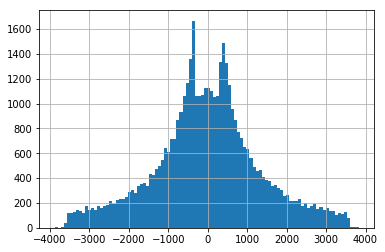

In [17]:
data_Bs_photons.xGen_extr.hist(bins=100)

In [22]:
def get_section_gen(data, section, border_modules=0):
    border_x = [323.2, 969.6, 1939.2, 3878.4]
    border_y = [323.2, 727.2, 1212.0, 3151.2]

    if section == 'inner':
        i=0
    elif section == 'middle':
        i=1
    elif section == 'outer':
        i=2
    else:
        print('section must be inner, middle or outer')
        return None
    
#     return data[((np.abs(data.xRec) < border_x[i+1] - 121.2*border_modules) & \
#                  (np.abs(data.yRec) < border_y[i+1] - 121.2*border_modules)) & \
#                 ((np.abs(data.xRec) > border_x[i] + 121.2*border_modules) | \
#                  (np.abs(data.yRec) > border_y[i] + 121.2*border_modules))]

    return data[((np.abs(data.xGen_extr) < border_x[i+1] - 121.2*border_modules) & \
                 (np.abs(data.yGen_extr) < border_y[i+1] - 121.2*border_modules)) & \
                ((np.abs(data.xGen_extr) > border_x[i] + 121.2*border_modules) | \
                 (np.abs(data.yGen_extr) > border_y[i] + 121.2*border_modules))]

In [23]:
data_Bs_photons_inner = get_section_gen(data_Bs_photons, 'inner')

In [24]:
len(data_Bs_photons_inner)

16091

(-3151.2, 3151.2)

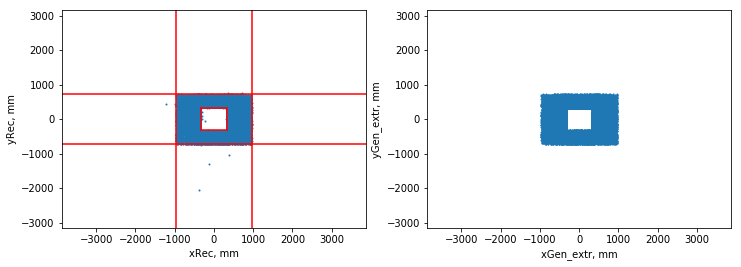

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].scatter(data_Bs_photons_inner.xRec,data_Bs_photons_inner.yRec, s=1)
ax[0].set_xlabel('xRec, mm')
ax[0].set_ylabel('yRec, mm')
ax[0].set_xlim((-border_x[3], border_x[3]))
ax[0].set_ylim((-border_y[3], border_y[3]))
#for i in range(1,2):
i=0
ax[0].axvline(x=-border_x[i], ymin=0.5-border_y[i]/border_y[3]/2, ymax=0.5+border_y[i]/border_y[3]/2, color='red')
ax[0].axvline(x=border_x[i], ymin=0.5-border_y[i]/border_y[3]/2, ymax=0.5+border_y[i]/border_y[3]/2, color='red')
ax[0].axhline(y=-border_y[i], xmin=0.5-border_x[i]/border_x[3]/2, xmax=0.5+border_x[i]/border_x[3]/2, color='red')
ax[0].axhline(y=border_y[i], xmin=0.5-border_x[i]/border_x[3]/2, xmax=0.5+border_x[i]/border_x[3]/2, color='red')

i=1
ax[0].axvline(x=-border_x[i], color='red') #, ymin=0.5-border_y[i]/border_y[3]/2, ymax=0.5+border_y[i]/border_y[3]/2, color='red')
ax[0].axvline(x=border_x[i], color='red')#, ymin=0.5-border_y[i]/border_y[3]/2, ymax=0.5+border_y[i]/border_y[3]/2, color='red')
ax[0].axhline(y=-border_y[i], color='red')#, xmin=0.5-border_x[i]/border_x[3]/2, xmax=0.5+border_x[i]/border_x[3]/2, color='red')
ax[0].axhline(y=border_y[i], color='red')#, xmin=0.5-border_x[i]/border_x[3]/2, xmax=0.5+border_x[i]/border_x[3]/2, color='red')

ax[1].scatter(data_Bs_photons_inner.xGen_extr,data_Bs_photons_inner.yGen_extr, s=1)
ax[1].set_xlabel('xGen_extr, mm')
ax[1].set_ylabel('yGen_extr, mm')
ax[1].set_xlim((-border_x[3], border_x[3]))
ax[1].set_ylim((-border_y[3], border_y[3]))

In [26]:
def get_cell_local_coord_in_section(data, section='inner'):
    cell_size = 40.4
    data['xGen_extr_loc'] = (data.xGen_extr + border_x[3]) - \
                np.fix((data.xGen_extr + border_x[3]) / cell_size) * cell_size - cell_size / 2.0
    
    data['yGen_extr_loc'] = (data.yGen_extr + border_y[3]) - \
                np.fix((data.yGen_extr + border_y[3]) / cell_size) * cell_size - cell_size / 2.0
    
    data['xRec_loc'] = (data.xRec + border_x[3]) - \
                np.fix((data.xGen_extr + border_x[3]) / cell_size) * cell_size - cell_size / 2.0
    
    data['yRec_loc'] = (data.yRec + border_y[3]) - \
                np.fix((data.yGen_extr + border_y[3]) / cell_size) * cell_size - cell_size / 2.0
    
    return data

df = get_cell_local_coord_in_section(data_Bs_photons_inner.copy());

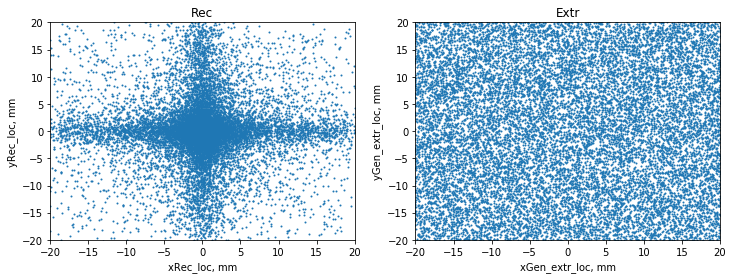

In [277]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].scatter(df.xRec_loc, df.yRec_loc, s=1)
ax[0].set_xlim((-20, 20))
ax[0].set_ylim((-20, 20))
ax[0].set_xlabel('xRec_loc, mm')
ax[0].set_ylabel('yRec_loc, mm')
ax[0].set_title('Rec')

ax[1].scatter(df.xGen_extr_loc, df.yGen_extr_loc, s=1)
ax[1].set_xlim((-20, 20))
ax[1].set_ylim((-20, 20))
ax[1].set_xlabel('xGen_extr_loc, mm')
ax[1].set_ylabel('yGen_extr_loc, mm')
ax[1].set_title('Extr')

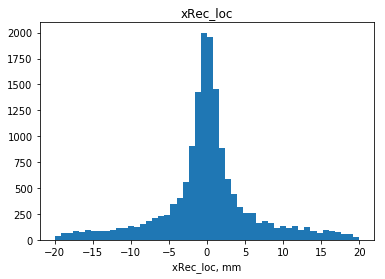

In [279]:
plt.hist(df.xRec_loc, bins=50, range=(-20,20));
plt.xlabel('xRec_loc, mm')
plt.title('xRec_loc')

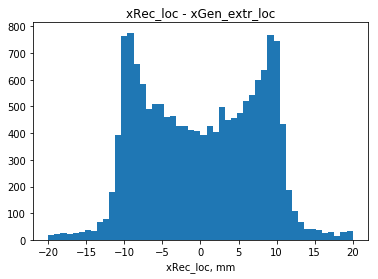

In [278]:
plt.hist(df.xRec_loc - df.xGen_extr_loc, bins=50, range=(-20,20));
plt.xlabel('xRec_loc, mm')
plt.title('xRec_loc - xGen_extr_loc')

(-20, 20)

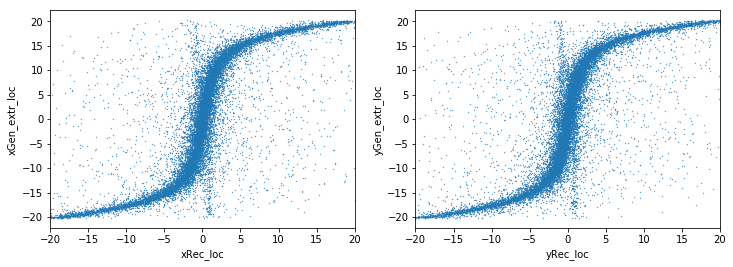

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].scatter(df.xRec_loc, df.xGen_extr_loc, s=0.1)
ax[0].set_xlabel('xRec_loc')
ax[0].set_ylabel('xGen_extr_loc')
ax[0].set_xlim((-20,20))

ax[1].scatter(df.yRec_loc, df.yGen_extr_loc, s=0.1)
ax[1].set_xlabel('yRec_loc')
ax[1].set_ylabel('yGen_extr_loc')
ax[1].set_xlim((-20,20))

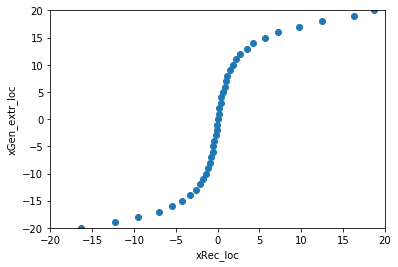

In [31]:
def plot(df):
    #-20 -19 -18 ... -1 0 1 2 ... 19 20
    dot_x = []
    dot_y = []
    for i in range(-20,21, 1):
        #dot_x.append(df[(df.xRec_loc > i) & (df.xRec_loc < )].mean())
        dot_y.append(i)
        dot_x.append(df[(df.xGen_extr_loc >= i) & (df.xGen_extr_loc < i + 1)].xRec_loc.median())
    
    plt.scatter(dot_x, dot_y)
    plt.xlim((-20,20))
    plt.ylim((-20,20))
    plt.xlabel('xRec_loc')
    plt.ylabel('xGen_extr_loc')

plot(df)

In [32]:
f = 1.403796
b = 3.339058
d = 1.0
x = 13
f * b * np.arcsinh((x / d) * np.cosh(d / b))

16.15452344821101

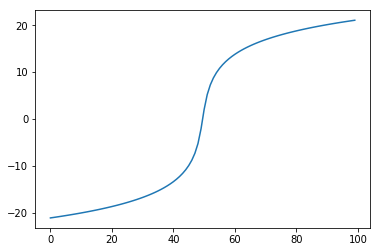

In [33]:
x = 0
d = 13
plt.plot([f*b*np.arcsinh((x / d)*np.cosh(d / b)) for x in np.linspace(-15,15,100)])

## Train\val\test

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [198]:
data = df[['xRec_loc', 'xGen_extr_loc']].copy()
X_train, X_test, y_train, y_test = \
                train_test_split(data[(data.xRec_loc >= -20.2) & (data.xRec_loc <= 20.2)][['xRec_loc']], \
                data[(data.xRec_loc >= -20.2) & (data.xRec_loc <= 20.2)][['xGen_extr_loc']], \
                shuffle=True, \
                test_size=0.30, random_state=42)

kf = KFold(n_splits = 10, random_state = 42, shuffle = True)

## Calibration with curve fit

In [193]:
f = 1.403796
b = 3.339058
d = 13

test_df = pd.DataFrame()
test_df['xRec_loc'] = X_test.values.reshape(-1,)
test_df['xGen_extr_loc'] = y_test.values.reshape(-1,)

test_df['xRec_loc_calib'] = f * b * np.arcsinh((test_df.xRec_loc / d) * np.cosh(d / b))

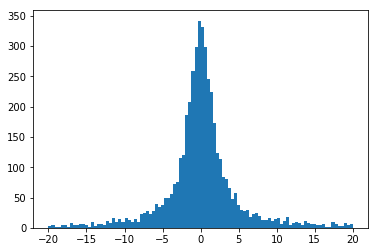

In [194]:
plt.hist(test_df.xRec_loc_calib - test_df.xGen_extr_loc, bins=100, range=(-20,20));

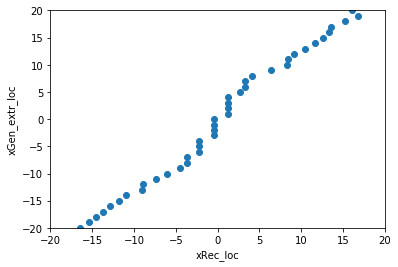

In [323]:
def plot(df):
    #-20 -19 -18 ... -1 0 1 2 ... 19 20
    dot_x = []
    dot_y = []
    for i in range(-20,21, 1):
        dot_y.append(i)
        dot_x.append(df[(df.xGen_extr_loc >= i) & (df.xGen_extr_loc < i + 1)].xRec_loc_calib.median())
    
    plt.scatter(dot_x, dot_y)
    plt.xlim((-20,20))
    plt.ylim((-20,20))
    plt.xlabel('xRec_loc')
    plt.ylabel('xGen_extr_loc')

plot(test_df)

In [212]:
def cross_val_test():
    rmse_list = []
    for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        #y_val, y_val_test = y_train.iloc[train_index].copy(), y_train.iloc[test_index]
        #X_val, X_val_test = X_train.iloc[train_index, :].copy(), X_train.iloc[test_index, :].copy()
        
        test_df = pd.DataFrame()
        test_df['xRec_loc'] = X_train.iloc[test_index, :].copy().values.reshape(-1,)
        test_df['xGen_extr_loc'] = y_train.iloc[test_index].values.reshape(-1,)
        test_df['xRec_loc_calib'] = f * b * np.arcsinh((test_df.xRec_loc / d) * np.cosh(d / b))
        #pred = model.predict(X_val_test)
        #print(np.std(test_df.xGen_extr_loc - test_df.xRec_loc_calib))
        rmse_list.append(np.std(test_df.xGen_extr_loc - test_df.xRec_loc_calib))
        # print('RMSE, validation set, fold ', i, ': ', mean_squared_error(y_val_test, pred) ** 0.5)
    print('mean std on vals: ', np.mean(rmse_list))
    
cross_val_test()

mean std on vals:  6.8023204843067955


In [213]:
print('std on test:', np.std(test_df.xGen_extr_loc - test_df.xRec_loc_calib))

std on test: 6.886288590119439


(-20, 20)

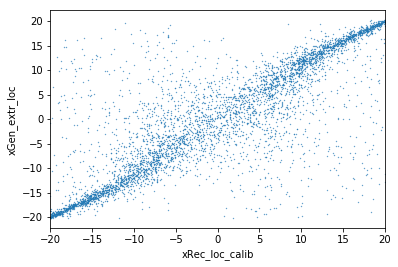

In [197]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(test_df.xRec_loc_calib, test_df.xGen_extr_loc, s=0.1)
ax.set_xlabel('xRec_loc_calib')
ax.set_ylabel('xGen_extr_loc')
ax.set_xlim((-20,20))

# Calibration with ML

In [42]:
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

/mnt/software/pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.4 of module '_catboost' does not match runtime version 3.6
  return f(*args, **kwds)


### RandomForest

In [283]:
def cross_val_test(model):
    y_test_predict = np.zeros_like(y_test.values.reshape(-1,))
    std_list = []
    for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        y_val, y_val_test = y_train.iloc[train_index].copy(), y_train.iloc[test_index]
        X_val, X_val_test = X_train.iloc[train_index, :].copy(), X_train.iloc[test_index, :].copy()

        # print("\nFold ", i)

        fit_model = model.fit(X_val, y_val.values.reshape(-1,)) #,logging_level='Silent')
        pred = model.predict(X_val_test)
        #print('RMSE, validation set, fold ', i, ': ', mean_squared_error(y_val_test, pred) ** 0.5)
        std_list.append(np.std(y_val_test.values.reshape(-1,) - pred))
        # print(y_val_test.shape, pred.shape)
        # print(np.std(y_val_test.values.reshape(-1,) - pred))

        y_test_predict += model.predict(X_test.values)


    std_list_mean = np.mean(std_list)
    #print('mean std of val:', np.mean(std_list))
    y_test_predict /= 10
    std_on_test = np.std(y_test.values.reshape(-1,)-y_test_predict)
    #print('std of test: ', np.std(y_test.values.reshape(-1,)-y_test_predict))
    return std_list_mean, std_on_test

In [288]:
result_RF = []
for iteration in [100,250,500,1000]:
    for depth in [1,2,3,4,5,6,7,8,9,10]:
        model = RandomForestRegressor(n_estimators=iteration,max_depth=depth,n_jobs=-1,criterion='mse')
        std_list_mean, std_on_test = cross_val_test(model)
        result_RF.append((iteration,depth,std_list_mean, std_on_test))

result_RF = pd.DataFrame(result_RF, columns=['iter','depth','std_mean_val', 'std_on_test'])
#result_RF.sort_values('std_on_test').reset_index()

In [289]:
result_RF.sort_values('std_on_test').reset_index().drop(['index'],axis=1).head()

iter  depth  std_mean_val  std_on_test
0   100      4      6.521390     6.579991
1   250      4      6.520311     6.580206
2  1000      4      6.521451     6.580317
3   500      4      6.521860     6.580473
4   100      5      6.533645     6.584866

In [290]:
result_RF.sort_values('std_mean_val').reset_index().drop(['index'],axis=1).head()

iter  depth  std_mean_val  std_on_test
0   250      4      6.520311     6.580206
1   100      4      6.521390     6.579991
2  1000      4      6.521451     6.580317
3   500      4      6.521860     6.580473
4   500      5      6.531789     6.585077

### CatBoost

In [273]:
result = []
for iteration in [100,250,500,1000]:
    for depth in [1,2,3,4,5,6,7,8,9,10]:
        model = CatBoostRegressor(iterations=iteration,depth=depth,loss_function='RMSE',random_seed=42, thread_count=-1)
        std_list_mean, std_on_test = cross_val_test(model)
        result.append((iteration,depth,std_list_mean, std_on_test))

result = pd.DataFrame(result, columns=['iter','depth','std_mean_val', 'std_on_test'])
result.sort_values('std_on_test').reset_index()

index  iter  depth  std_mean_val  std_on_test
0      14   250      5      6.516630     6.569278
1      12   250      3      6.517520     6.570392
2      22   500      3      6.517498     6.570902
3      15   250      6      6.516259     6.571098
4      21   500      2      6.518976     6.571246
5      13   250      4      6.516951     6.571405
6      18   250      9      6.515790     6.571475
7      16   250      7      6.515684     6.571597
8      24   500      5      6.518761     6.571712
9      17   250      8      6.515731     6.571825
10     31  1000      2      6.518756     6.571871
11     11   250      2      6.520374     6.571895
12     23   500      4      6.517854     6.572287
13     19   250     10      6.515974     6.572362
14     32  1000      3      6.518761     6.572371
15     30  1000      1      6.520827     6.572696
16     20   500      1      6.521175     6.573206
17     25   500      6      6.519308     6.574067
18     33  1000      4      6.520237     6.574322
19     34  1000      5      6.522015     6.575607
20     26   500      7      6.520157     6.575641
21     27   500      8      6.520826     6.576262
22     28   500      9      6.521080     6.577315
23     35  1000      6      6.523811     6.578466
24     29   500     10      6.522318     6.578623
25     10   250      1      6.527937     6.578982
26     36  1000      7      6.525667     6.580732
27     37  1000      8      6.527139     6.582432
28      8   100      9      6.534870     6.583782
29      9   100     10      6.533338     6.584055
30     38  1000      9      6.527799     6.584235
31      7   100      8      6.535699     6.586281
32     39  1000     10      6.529522     6.586523
33      6   100      7      6.537119     6.588280
34      5   100      6      6.538166     6.588763
35      4   100      5      6.542940     6.589066
36      3   100      4      6.547452     6.595163
37      2   100      3      6.559090     6.604058
38      1   100      2      6.588933     6.630813
39      0   100      1      6.772409     6.805280

In [282]:
result.sort_values('std_mean_val').reset_index().drop(['index'],axis=1).head()

iter  depth  std_mean_val  std_on_test
0   250      7      6.515684     6.571597
1   250      8      6.515731     6.571825
2   250      9      6.515790     6.571475
3   250     10      6.515974     6.572362
4   250      6      6.516259     6.571098

## Step function

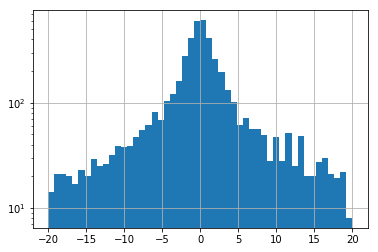

In [54]:
test_df[(test_df.xRec_loc >= -20) | (test_df.xRec_loc <= 20)].xRec_loc.hist(bins=50, range=(-20,20), log=True)

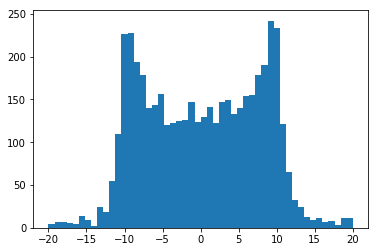

In [55]:
plt.hist(test_df.xRec_loc - test_df.xGen_extr_loc, bins=50, range=(-20,20));

In [292]:
train_df = pd.DataFrame()
train_df['xRec_loc'] = X_train.values.reshape(-1,)
train_df['xGen_extr_loc'] = y_train.values.reshape(-1,)

In [327]:
def step_func(N, train=train_df, test=test_df):    
    left_bound = -20.2
    right_bound = 20.2
    step = (right_bound - left_bound) / (N)
    for index in np.linspace(left_bound, right_bound-step, N):
        mean_step = np.mean(train_df.loc[((train_df.xRec_loc >= index) & (train_df.xRec_loc <= index + step)), 'xGen_extr_loc'])
        test_df.loc[((test_df.xRec_loc >= index) & (test_df.xRec_loc <= index + step)), 'xRec_loc_calib'] = mean_step

    return np.std((test_df.loc[((test_df.xRec_loc >= -20.2) & (test_df.xRec_loc <= 20.2)), 'xGen_extr_loc'] - \
                test_df.loc[((test_df.xRec_loc >= -20.2) & (test_df.xRec_loc <= 20.2)), 'xRec_loc_calib']))

In [328]:
result_step_func = []
for N in range(10,201,10):
    result_step_func.append((N, step_func(N)))

In [329]:
result_step_func = pd.DataFrame(result_step_func, columns=['N','std_on_test'])

In [321]:
result_step_func.sort_values('std_on_test').reset_index().drop(['index'],axis=1).head()

N  std_on_test
0  140     6.604631
1   70     6.607233
2   90     6.608082
3  100     6.608341
4   80     6.620755

In [331]:
def cross_val_test_step_func():
    y_test_predict = np.zeros_like(y_test.values.reshape(-1,))
    std_list = []
    for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        std_list.append(step_func(140, train_df.iloc[train_index], train_df.iloc[test_index]))

    std_list_mean = np.mean(std_list)
    
    return std_list_mean

cross_val_test_step_func()

6.604630800363447